По данным Центра по контролю и профилактике заболеваний (CDC), болезни сердца являются сегодня главной причиной преждевременной смерти людей в развитых странах. На развитие болезней сердца влияет множество факторов. Согласно исследованиям Национального института сердца, лёгких и крови во Фрамингеме (США), основными из них являются вредные привычки (курение, употребление алкоголя), ожирение и малоподвижный образ жизни. Методы машинного обучения могут помочь обнаружить определенные закономерности между данными о состоянии пациента и развитием сердечно-сосудистых заболеваний.

Загрузим датасет "Indicators of Heart Disease" с Kaggle и проанализируем данные.
ссылка на датасет: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

Цель: провести предварительный анализ данных

Задачи: 
1. Проверить датасет на наличие дубликатов и отсутствующих значений
2. Построить визуализацию эндогенной переменной, категориальных и числовых признаков 
3. Преобразовать категориальные переменные в числовые 
4. Выявить и удалить аномальные значения в данных 
5. Построить корреляцию экзогенных переменных с эндогенной, выявить корреляционные связи между экзогенными переменными
6. Рассмотреть таргетную переменную на количество и содержание классов
7. Сделать выводы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('heart_2022.csv')
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 60 to 64,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 25 to 29,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Multiracial, Non-Hispanic",Age 65 to 69,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


В данном датасете содержится информация более чем о 200000 человек из США с указанием 40 параметров, которые могут оказать влияние на развитие болезни сердца.

Целевой переменной является HadHeartAttack (был ли у человека инфаркт).

Задача машинного обучения - задача бинарной классификации для определения случится ли у человека инфаркт или нет.

Проверка на дубликаты

In [3]:
duplicated = data.duplicated()
print(duplicated.sum())

9


In [4]:
data[duplicated]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 75 to 79,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
88402,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 50 to 54,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
137645,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
174923,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 75 to 79,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
184137,South Dakota,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 70 to 74,1.75,90.72,29.53,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
208013,Vermont,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 70 to 74,1.65,79.38,29.12,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
216362,Washington,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 60 to 64,1.80,77.11,23.71,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
225974,Washington,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,1.93,104.33,28.00,Yes,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Удалим дубликаты

In [5]:
data.drop_duplicates(keep='first',inplace=True)
data.duplicated().sum()

0

In [6]:
data.shape

(246013, 40)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  HadAngina                  246013 non-null  object 
 11  HadStroke                  246013 non-null  object 
 12  HadAsthma                  246013 non-null  object 
 13  HadSkinCancer              246013 

Датасет не содержит отсутствующие значения.

Датасет содержит как числовые (float64), так и нечисловые (object) признаки

Рассмотрим каждый столбец.
1. State                      - штат пациента
2. Sex                        - пол пациента
3. GeneralHealth              - общее самочувствие ("Excellent", "Very good", "Good", "Fair", "Poor")
4. PhysicalHealthDays         - кол-во дней плохого физического самочувствия за последний месяц (0-30)
5. MentalHealthDays           - кол-во дней плохого психического самочувствия за последний месяц (0-30)
6. LastCheckupTime            - последнее посещение врачей ("Within past year (anytime less than 12 months ago)", "Within past 2 years (1 year but less than 2 years ago)", "Within past 5 years (2 years but less than 5 years ago)", "5 or more years ago"
7. PhysicalActivities         - занимается ли физическими упражнениями ('Yes', 'No')
8. SleepHours                 - среднее кол-во часов сна
9. RemovedTeeth               - кол-во удаленных зубов ("1 to 5", "6 or more, but not all", "All", "None of them")
10. HadHeartAttack            - есть болезнь сердца ('Yes', 'No')
11. HadAngina                 - была стенокардия ('Yes', 'No')
12. HadStroke                 - был сердечный приступ ('Yes', 'No')
13. HadAsthma                 - есть астма ('Yes', 'No')
14. HadSkinCancer             - есть ли рак кожи ('Yes', 'No')
15. HadCOPD                   - есть болезни легких ('Yes', 'No')
16. HadDepressiveDisorder     - есть депрессия ('Yes', 'No')
17. HadKidneyDisease          - есть заболевания почек ('Yes', 'No')
18. HadArthritis              - есть артрит ('Yes', 'No')
19. HadDiabetes               - есть диабет ("Yes", "Yes, but only during pregnancy (female)", "No", "No, pre-diabetes or borderline diabetes")
20. DeafOrHardOfHearing       - проблемы со слухом ('Yes', 'No')
21. BlindOrVisionDifficulty   - проблемы со зрением ('Yes', 'No')
22. DifficultyConcentrating   - проблемы с концетрацией ('Yes', 'No')
23. DifficultyWalking         - сложности с ходьбой ('Yes', 'No')
24. DifficultyDressingBathing - сложности с выполнением рутинных дел ('Yes', 'No')
25. DifficultyErrands         - сложности с выполнением поручений ('Yes', 'No')
26. SmokerStatus              - курит ("Current smoker - now smokes every day", "Current smoker - now smokes some days", "Former smoker", "Never smoked")
27. ECigaretteUsage           - курит электронные сигареты ("Never used e-cigarettes in my entire life", "Use them every day", "Use them some days", "Not at all (right now)")
28. ChestScan                 - делал рентген легких ('Yes', 'No')
29. RaceEthnicityCategory     - расовая принадлежность ("White only, Non-Hispanic", "Black only, Non-Hispanic", "Other race only, Non-Hispanic", "Multiracial, Non-Hispanic", "Hispanic")
30. AgeCategory               - возраст ("Age 18 to 24", "Age 25 to 29", "Age 30 to 34",
"Age 35 to 39",
"Age 40 to 44",
"Age 45 to 49",
"Age 50 to 54",
"Age 55 to 59",
"Age 60 to 64",
"Age 65 to 69",
"Age 70 to 74",
"Age 75 to 79",
"Age 80 or older")
31. HeightInMeters            - рост в метрах
32. WeightInKilograms         - вес в килограммах
33. BMI                       - индекс массы тела (ИМТ)
34. AlcoholDrinkers           - пьет алкоголь ('Yes', 'No')
35. HIVTesting                - были инфекционные заболевания ('Yes', 'No')
36. FluVaxLast12              - был грипп в последние 12 месяцев ('Yes', 'No')
37. PneumoVaxEver             - была пневмония ('Yes', 'No')
38. TetanusLast10Tdap         - делал прививку от столбняка в последние 10 дней ("Yes, received Tdap", "Yes, received tetanus shot, but not Tdap", "Yes, received tetanus shot but not sure what type", "No, did not receive any tetanus shot in the past 10 years")
39. HighRiskLastYear          - принимает наркотики ('Yes', 'No')
40. CovidPos                  - делал тест на коронавирус ("Yes", "No", "Tested positive using home test without a health professional")

Визуализируем данные.

In [8]:
mypal = ['#8AEA31', '#EB4334', '#953BEB', '#EAB331', '#3AF0E2']

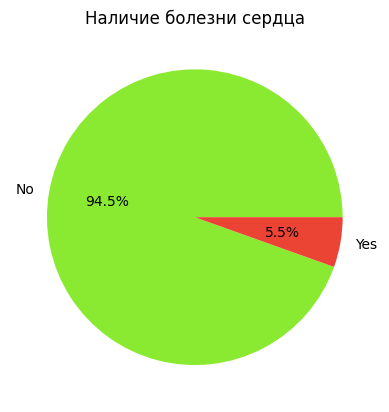

In [9]:
HeartDisease_rate = data["HadHeartAttack"].value_counts()
plt.pie(HeartDisease_rate.values, labels = HeartDisease_rate.index, colors = mypal, autopct="%1.1f%%")
plt.title("Наличие болезни сердца")
plt.show()

У большинства опрошенных нет сердечных заболеваний

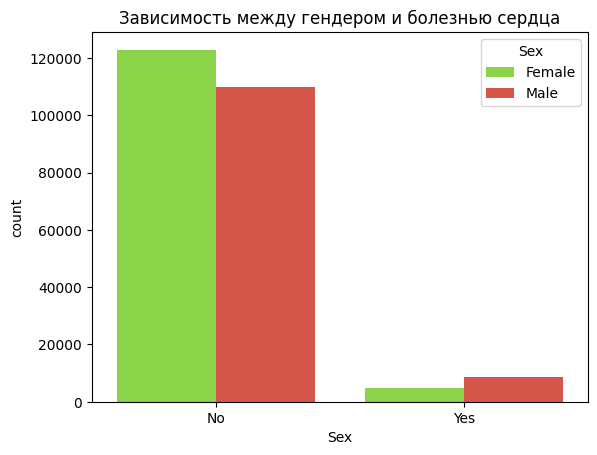

In [10]:
sns.countplot(x = "HadHeartAttack", hue = "Sex", data = data, palette=mypal)
plt.title("Зависимость между гендером и болезнью сердца")
plt.xlabel("Sex")
plt.show()

Болезнь сердца чаще всего встречается у мужчин

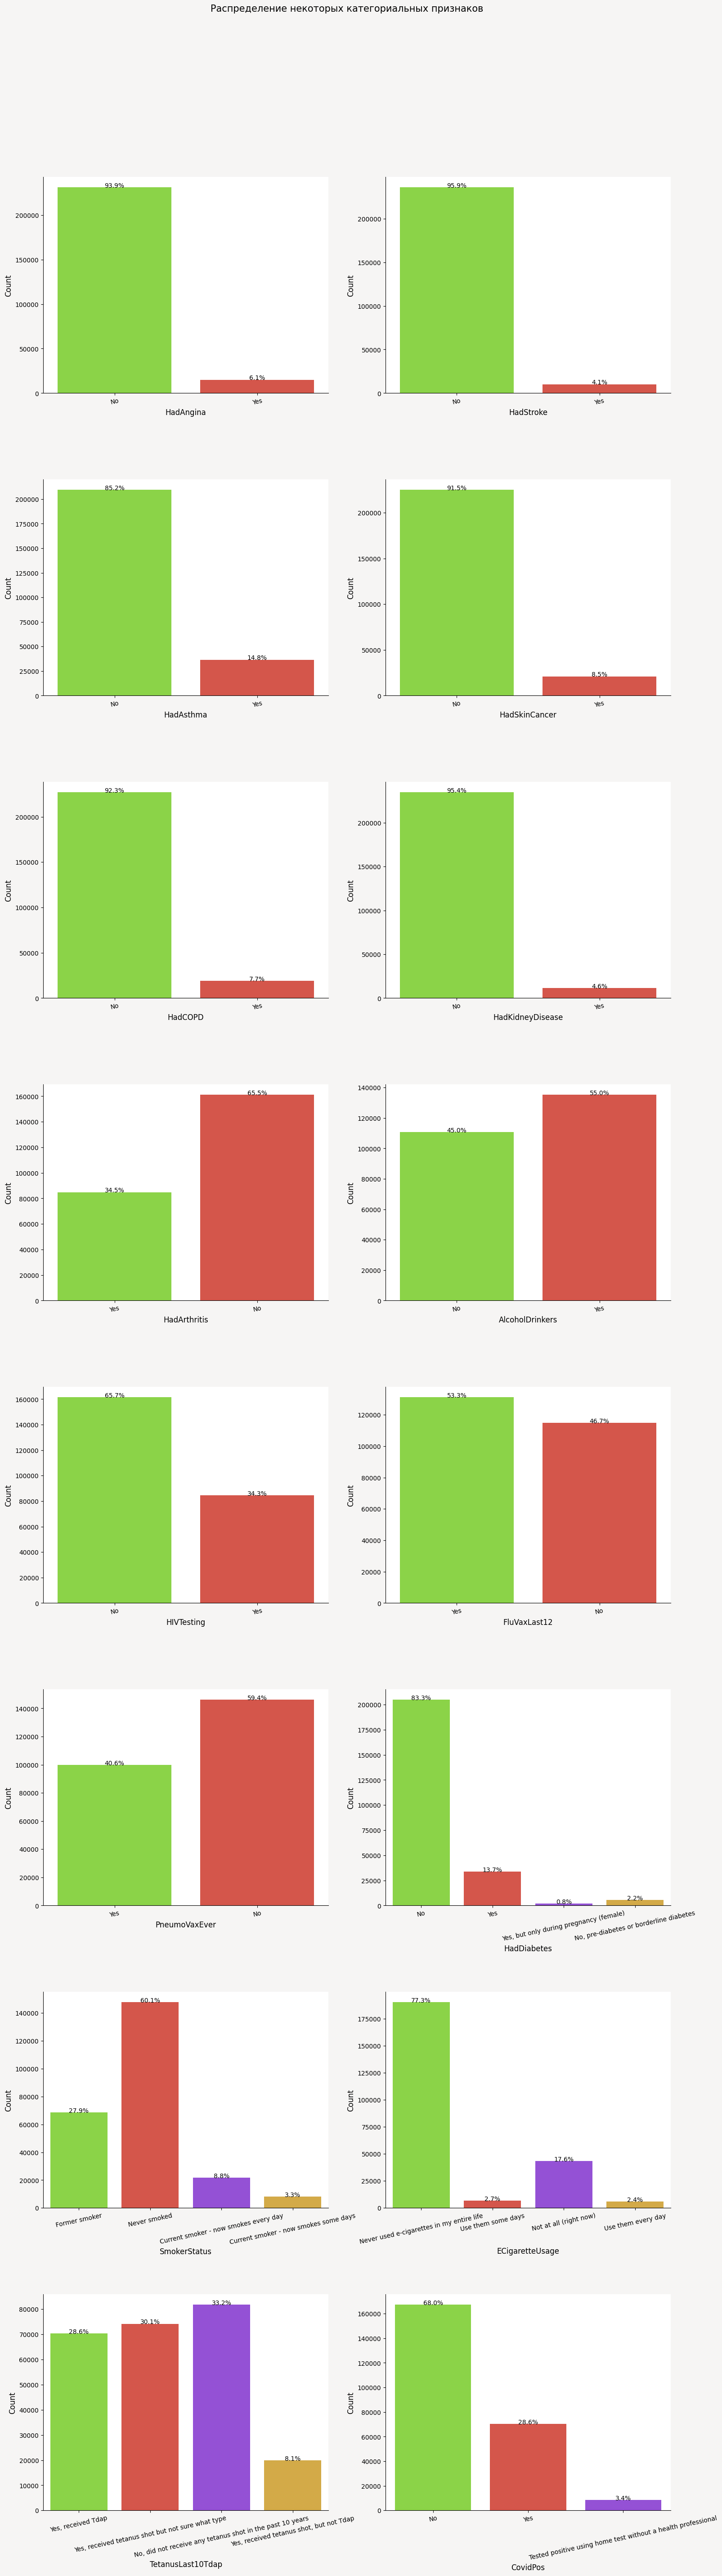

In [11]:
cat_feats = ['HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD',
             'HadKidneyDisease', 'HadArthritis','AlcoholDrinkers','HIVTesting',
             'FluVaxLast12','PneumoVaxEver', 'HadDiabetes', 'SmokerStatus',
             'ECigaretteUsage', 'TetanusLast10Tdap', 'CovidPos']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

i = 0
for col in cat_feats:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=data, x=col, palette=mypal, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=12)

    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Распределение некоторых категориальных признаков', fontsize=15)
plt.show()

Из представленных выше графиков можно сделать вывод, что большинство опрошенных не курят, не болели ангиной, астмой, не имели инфаркта, рака кожи, болезни легких, болезни почек или диабета. Около трети опрошенных имеют артрит и болели инфекционными заболеваниями. Примерно половина всех респондентов употребляет алкоголь,болела гриппом и/или пневмонией.


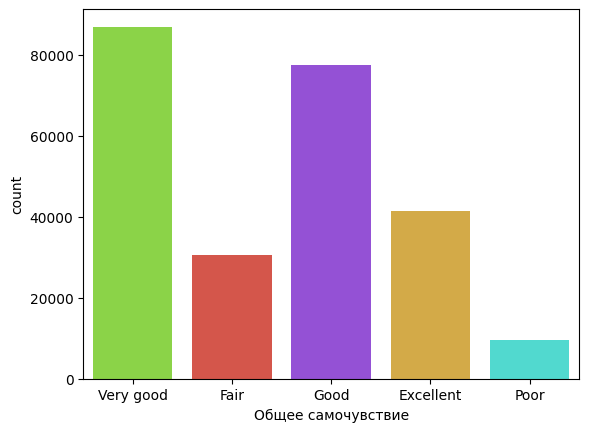

In [12]:
sns.countplot(x = "GeneralHealth", data = data, palette=mypal)
plt.xlabel("Общее самочувствие")
plt.show()

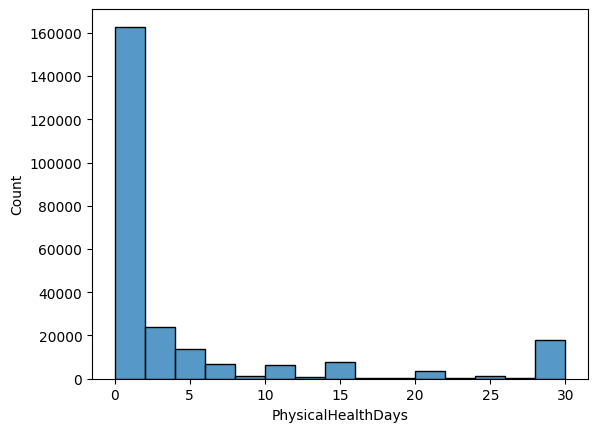

In [13]:
sns.histplot(data=data, x="PhysicalHealthDays", bins=15)
plt.show()

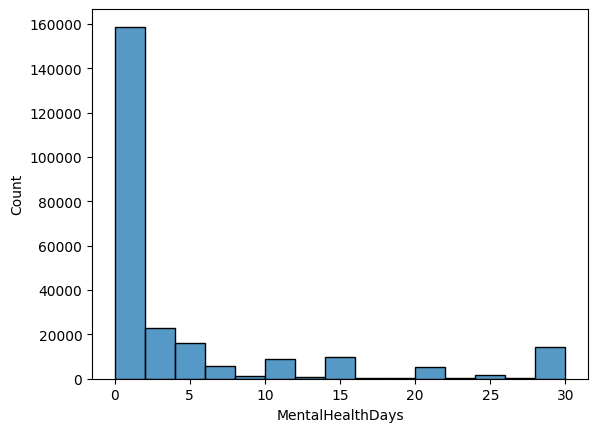

In [14]:
sns.histplot(data=data, x="MentalHealthDays", bins=15)
plt.show()

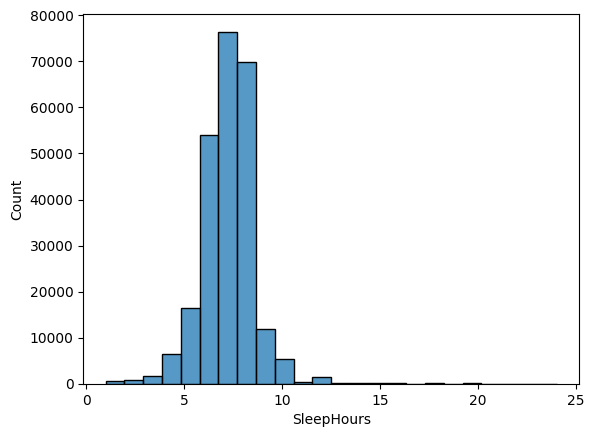

In [15]:
sns.histplot(data=data, x="SleepHours", bins=24)
plt.show()

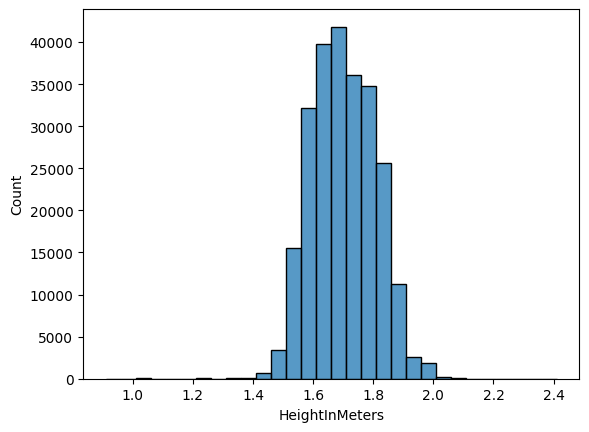

In [16]:
sns.histplot(data=data, x="HeightInMeters", bins=30)
plt.show()

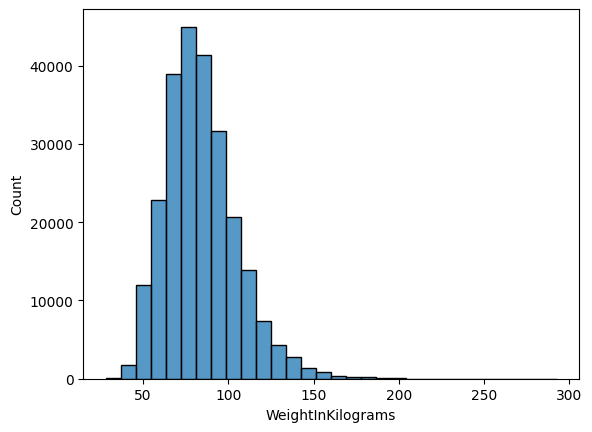

In [17]:
sns.histplot(data=data, x="WeightInKilograms", bins=30)
plt.show()

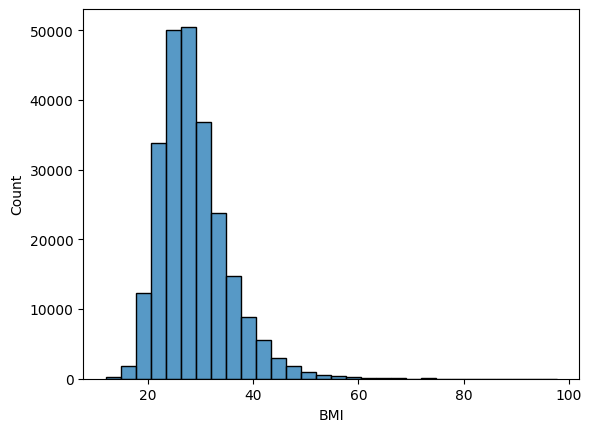

In [18]:
sns.histplot(data=data, x="BMI", bins=30)
plt.show()

Для корректной работы моделей машинного обучения необходимо, чтобы на вход подавались числовые признаки.

Для преобразования бинарных признаков используется LabelEncounter

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [21]:
columns = ['State', 'Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
        'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'HighRiskLastYear']
labelencoder = LabelEncoder()
for col in columns:
    data[col] = labelencoder.fit_transform(data[col])

In [22]:
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,0,0,0,0,0,0,1,No,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,0,0,1,1,"Yes, received Tdap",0,No
1,0,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,0,0,0,0,0,0,0,1,Yes,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,No
2,0,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,0,0,0,0,0,0,0,1,No,0,1,0,1,0,0,Former smoker,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,Yes
3,0,0,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,0,0,1,0,1,0,1,No,0,0,0,1,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,Yes
4,0,0,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,0,0,0,0,0,0,0,1,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,48,1,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,1,6.0,None of them,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Age 60 to 64,1.78,102.06,32.28,1,0,0,0,"Yes, received tetanus shot but not sure what type",0,No
246018,48,0,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,1,7.0,None of them,0,0,0,0,0,0,1,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"Black only, Non-Hispanic",Age 25 to 29,1.93,90.72,24.34,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,Yes
246019,48,1,Good,0.0,15.0,Within past year (anytime less than 12 months ...,1,7.0,1 to 5,0,0,1,0,0,0,0,0,1,Yes,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"Multiracial, Non-Hispanic",Age 65 to 69,1.68,83.91,29.86,1,1,1,1,"Yes, received tetanus shot but not sure what type",0,Yes
246020,48,0,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1,7.0,None of them,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,0,1,1,0,"Yes, received tetanus shot but not sure what type",0,No


In [23]:
gen_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

data['GeneralHealth'] = data['GeneralHealth'].replace(gen_health_mapping).astype(int)

In [24]:
checkup_mapping = {
    'Within past year (anytime less than 12 months ago)': 0,
    "Within past 2 years (1 year but less than 2 years ago)": 1,
    "Within past 5 years (2 years but less than 5 years ago)": 2,
    "5 or more years ago": 3
}

data['LastCheckupTime'] = data['LastCheckupTime'].replace(checkup_mapping).astype(int)

In [25]:
data.drop('RemovedTeeth', axis=1 , inplace=True)

Группируем категории некоторых признаков, так как есть категории незначимые

In [26]:
HadDiabetes_mapping = {
    "Yes": 0,
    "Yes, but only during pregnancy (female)": 0,
    "No": 1,
    "No, pre-diabetes or borderline diabetes": 1
}

data['HadDiabetes'] = data['HadDiabetes'].replace(HadDiabetes_mapping).astype(int)

In [27]:
ECigaretteUsage_mapping = {
    "Never used e-cigarettes in my entire life": 0,
    "Use them every day": 1,
    "Use them some days": 1,
    "Not at all (right now)": 2
}

data['ECigaretteUsage'] = data['ECigaretteUsage'].replace(ECigaretteUsage_mapping).astype(int)

In [28]:
SmokerStatus_mapping = {
    "Current smoker - now smokes every day": 0,
    "Current smoker - now smokes some days": 0,
    "Former smoker": 1,
    "Never smoked": 2
}

data['SmokerStatus'] = data['SmokerStatus'].replace(SmokerStatus_mapping).astype(int)

In [29]:
race_mapping = {
    'Multiracial, Non-Hispanic': 0,
    'Black only, Non-Hispanic': 1,
    'Hispanic': 2,
    'Other race only, Non-Hispanic': 3,
    'White only, Non-Hispanic': 4
}

data['RaceEthnicityCategory'] = data['RaceEthnicityCategory'].replace(race_mapping).astype(int)

In [30]:
age_mapping = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

data['AgeCategory'] = data['AgeCategory'].replace(age_mapping).astype(int)

In [31]:
TetanusLast10Tdap_mapping = {
    "Yes, received Tdap": 0,
    "Yes, received tetanus shot, but not Tdap": 1,
    "Yes, received tetanus shot but not sure what type": 2,
    "No, did not receive any tetanus shot in the past 10 years": 3
}

data['TetanusLast10Tdap'] = data['TetanusLast10Tdap'].replace(TetanusLast10Tdap_mapping).astype(int)

In [32]:
CovidPos_mapping = {
    "Yes": 0,
    "No": 1,
    "Tested positive using home test without a health professional": 2
}

data['CovidPos'] = data['CovidPos'].replace(CovidPos_mapping).astype(int)

In [33]:
data.dtypes

State                          int32
Sex                            int32
GeneralHealth                  int32
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int32
PhysicalActivities             int32
SleepHours                   float64
HadHeartAttack                 int32
HadAngina                      int32
HadStroke                      int32
HadAsthma                      int32
HadSkinCancer                  int32
HadCOPD                        int32
HadDepressiveDisorder          int32
HadKidneyDisease               int32
HadArthritis                   int32
HadDiabetes                    int32
DeafOrHardOfHearing            int32
BlindOrVisionDifficulty        int32
DifficultyConcentrating        int32
DifficultyWalking              int32
DifficultyDressingBathing      int32
DifficultyErrands              int32
SmokerStatus                   int32
ECigaretteUsage                int32
ChestScan                      int32
R

Теперь все нечисловые признаки стали числовыми

In [34]:
data[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
      'HeightInMeters', 'WeightInKilograms', 'BMI']].describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


Выявим аномальные значения. 

Text(0.5, 0, 'Часы сна')

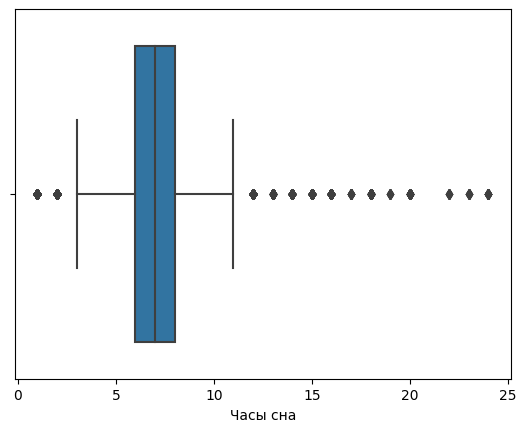

In [35]:
sns.boxplot(x=data['SleepHours'])
plt.xlabel('Часы сна')

In [36]:
print(data[(data['SleepHours']>16)].count())

State                        173
Sex                          173
GeneralHealth                173
PhysicalHealthDays           173
MentalHealthDays             173
LastCheckupTime              173
PhysicalActivities           173
SleepHours                   173
HadHeartAttack               173
HadAngina                    173
HadStroke                    173
HadAsthma                    173
HadSkinCancer                173
HadCOPD                      173
HadDepressiveDisorder        173
HadKidneyDisease             173
HadArthritis                 173
HadDiabetes                  173
DeafOrHardOfHearing          173
BlindOrVisionDifficulty      173
DifficultyConcentrating      173
DifficultyWalking            173
DifficultyDressingBathing    173
DifficultyErrands            173
SmokerStatus                 173
ECigaretteUsage              173
ChestScan                    173
RaceEthnicityCategory        173
AgeCategory                  173
HeightInMeters               173
WeightInKi

Удалим выбросы

In [37]:
data = data[(data['SleepHours'] < 17)]
data.shape

(245840, 39)

<Axes: xlabel='PhysicalHealthDays'>

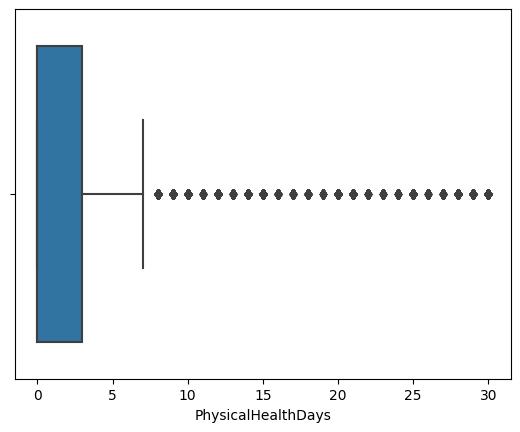

In [38]:
sns.boxplot(x=data['PhysicalHealthDays'])

In [39]:
print(data[(data['PhysicalHealthDays']>29)].count())

State                        17117
Sex                          17117
GeneralHealth                17117
PhysicalHealthDays           17117
MentalHealthDays             17117
LastCheckupTime              17117
PhysicalActivities           17117
SleepHours                   17117
HadHeartAttack               17117
HadAngina                    17117
HadStroke                    17117
HadAsthma                    17117
HadSkinCancer                17117
HadCOPD                      17117
HadDepressiveDisorder        17117
HadKidneyDisease             17117
HadArthritis                 17117
HadDiabetes                  17117
DeafOrHardOfHearing          17117
BlindOrVisionDifficulty      17117
DifficultyConcentrating      17117
DifficultyWalking            17117
DifficultyDressingBathing    17117
DifficultyErrands            17117
SmokerStatus                 17117
ECigaretteUsage              17117
ChestScan                    17117
RaceEthnicityCategory        17117
AgeCategory         

Большой объем данных потеряется, если удалить значения, поэтому оставим их.

<Axes: xlabel='MentalHealthDays'>

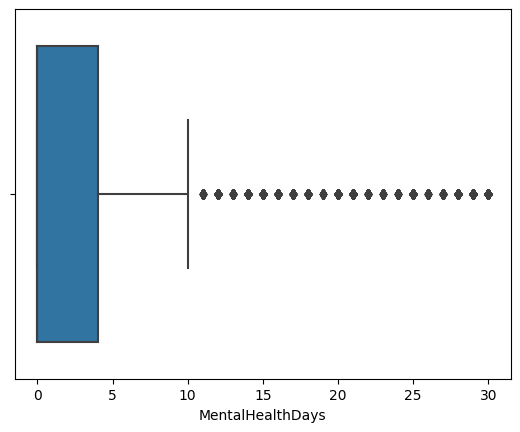

In [40]:
sns.boxplot(x=data['MentalHealthDays'])

In [41]:
print(data[(data['MentalHealthDays']>29)].count())

State                        13665
Sex                          13665
GeneralHealth                13665
PhysicalHealthDays           13665
MentalHealthDays             13665
LastCheckupTime              13665
PhysicalActivities           13665
SleepHours                   13665
HadHeartAttack               13665
HadAngina                    13665
HadStroke                    13665
HadAsthma                    13665
HadSkinCancer                13665
HadCOPD                      13665
HadDepressiveDisorder        13665
HadKidneyDisease             13665
HadArthritis                 13665
HadDiabetes                  13665
DeafOrHardOfHearing          13665
BlindOrVisionDifficulty      13665
DifficultyConcentrating      13665
DifficultyWalking            13665
DifficultyDressingBathing    13665
DifficultyErrands            13665
SmokerStatus                 13665
ECigaretteUsage              13665
ChestScan                    13665
RaceEthnicityCategory        13665
AgeCategory         

Большой объем данных потеряется, если удалить значения, поэтому оставим их.

<Axes: xlabel='HeightInMeters'>

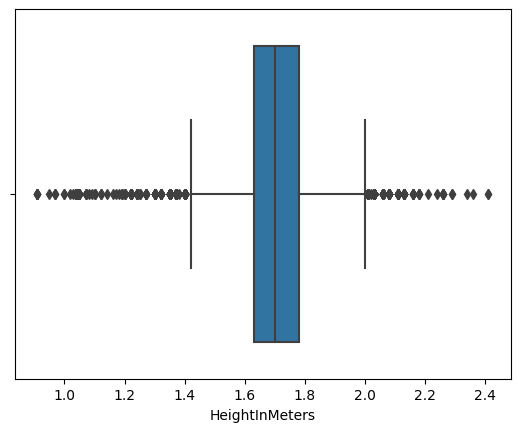

In [42]:
sns.boxplot(x=data['HeightInMeters'])

In [43]:
print(data[(data['HeightInMeters']>2.1)].count())

State                        53
Sex                          53
GeneralHealth                53
PhysicalHealthDays           53
MentalHealthDays             53
LastCheckupTime              53
PhysicalActivities           53
SleepHours                   53
HadHeartAttack               53
HadAngina                    53
HadStroke                    53
HadAsthma                    53
HadSkinCancer                53
HadCOPD                      53
HadDepressiveDisorder        53
HadKidneyDisease             53
HadArthritis                 53
HadDiabetes                  53
DeafOrHardOfHearing          53
BlindOrVisionDifficulty      53
DifficultyConcentrating      53
DifficultyWalking            53
DifficultyDressingBathing    53
DifficultyErrands            53
SmokerStatus                 53
ECigaretteUsage              53
ChestScan                    53
RaceEthnicityCategory        53
AgeCategory                  53
HeightInMeters               53
WeightInKilograms            53
BMI     

In [44]:
print(data[(data['HeightInMeters']<1.1)].count())

State                        49
Sex                          49
GeneralHealth                49
PhysicalHealthDays           49
MentalHealthDays             49
LastCheckupTime              49
PhysicalActivities           49
SleepHours                   49
HadHeartAttack               49
HadAngina                    49
HadStroke                    49
HadAsthma                    49
HadSkinCancer                49
HadCOPD                      49
HadDepressiveDisorder        49
HadKidneyDisease             49
HadArthritis                 49
HadDiabetes                  49
DeafOrHardOfHearing          49
BlindOrVisionDifficulty      49
DifficultyConcentrating      49
DifficultyWalking            49
DifficultyDressingBathing    49
DifficultyErrands            49
SmokerStatus                 49
ECigaretteUsage              49
ChestScan                    49
RaceEthnicityCategory        49
AgeCategory                  49
HeightInMeters               49
WeightInKilograms            49
BMI     

Удалим выбросы

In [45]:
data = data[(data['HeightInMeters'] < 2.2)]
data = data[(data['HeightInMeters'] > 1)]
data.shape

(245814, 39)

<Axes: xlabel='WeightInKilograms'>

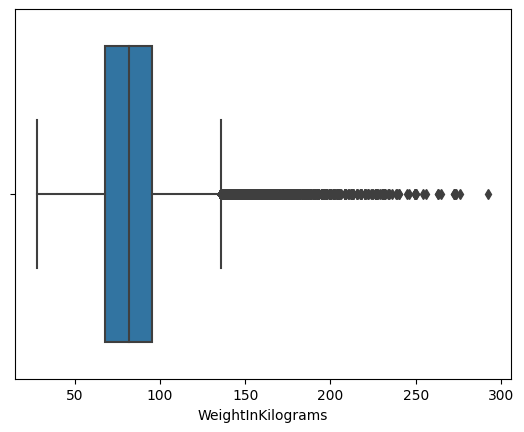

In [46]:
sns.boxplot(x=data['WeightInKilograms'])

In [47]:
print(data[(data['WeightInKilograms']>210)].count())

State                        88
Sex                          88
GeneralHealth                88
PhysicalHealthDays           88
MentalHealthDays             88
LastCheckupTime              88
PhysicalActivities           88
SleepHours                   88
HadHeartAttack               88
HadAngina                    88
HadStroke                    88
HadAsthma                    88
HadSkinCancer                88
HadCOPD                      88
HadDepressiveDisorder        88
HadKidneyDisease             88
HadArthritis                 88
HadDiabetes                  88
DeafOrHardOfHearing          88
BlindOrVisionDifficulty      88
DifficultyConcentrating      88
DifficultyWalking            88
DifficultyDressingBathing    88
DifficultyErrands            88
SmokerStatus                 88
ECigaretteUsage              88
ChestScan                    88
RaceEthnicityCategory        88
AgeCategory                  88
HeightInMeters               88
WeightInKilograms            88
BMI     

Удалим выбросы

In [48]:
data = data[(data['SleepHours'] < 211)]
data.shape

(245814, 39)

<Axes: xlabel='BMI'>

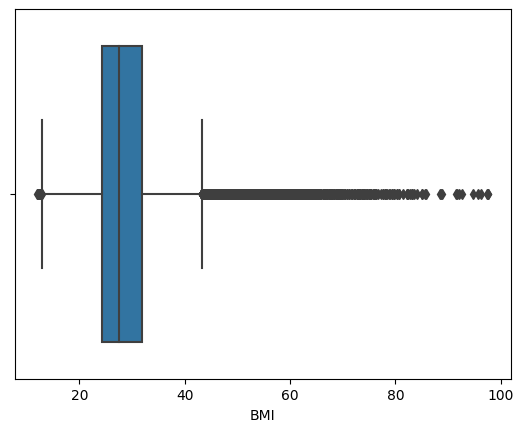

In [49]:
sns.boxplot(x=data['BMI'])

In [50]:
print(data[(data['BMI']>75)].count())

State                        59
Sex                          59
GeneralHealth                59
PhysicalHealthDays           59
MentalHealthDays             59
LastCheckupTime              59
PhysicalActivities           59
SleepHours                   59
HadHeartAttack               59
HadAngina                    59
HadStroke                    59
HadAsthma                    59
HadSkinCancer                59
HadCOPD                      59
HadDepressiveDisorder        59
HadKidneyDisease             59
HadArthritis                 59
HadDiabetes                  59
DeafOrHardOfHearing          59
BlindOrVisionDifficulty      59
DifficultyConcentrating      59
DifficultyWalking            59
DifficultyDressingBathing    59
DifficultyErrands            59
SmokerStatus                 59
ECigaretteUsage              59
ChestScan                    59
RaceEthnicityCategory        59
AgeCategory                  59
HeightInMeters               59
WeightInKilograms            59
BMI     

Удалим выбросы

In [51]:
data = data[(data['BMI'] < 76)]
data.shape

(245763, 39)

In [52]:
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,3,4.0,0.0,0,1,9.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,4,9,1.60,71.67,27.99,0,0,1,1,0,0,1
1,0,1,3,0.0,0.0,0,1,6.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,10,1.78,95.25,30.13,0,0,1,1,2,0,1
2,0,1,3,0.0,0.0,0,0,8.0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,4,11,1.85,108.86,31.66,1,0,0,1,3,0,0
3,0,0,1,5.0,0.0,0,1,9.0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,2,0,0,4,12,1.70,90.72,31.32,0,0,1,1,3,0,0
4,0,0,2,3.0,15.0,0,1,5.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,0,4,12,1.55,79.38,33.07,0,0,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,48,1,3,0.0,0.0,1,1,6.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,4,8,1.78,102.06,32.28,1,0,0,0,2,0,1
246018,48,0,1,0.0,7.0,0,1,7.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,1,1,1.93,90.72,24.34,0,0,0,0,3,0,0
246019,48,1,2,0.0,15.0,0,1,7.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,9,1.68,83.91,29.86,1,1,1,1,2,0,0
246020,48,0,4,2.0,2.0,0,1,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,1,6,1.70,83.01,28.66,0,1,1,0,2,0,1


In [53]:
#Корреляция с Y
cor = data.corr()
cor_target = abs(cor["HadHeartAttack"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("HadHeartAttack" , ascending=False)

,HadHeartAttack
HadHeartAttack,1.000000
HadAngina,0.445611
GeneralHealth,0.185533
HadStroke,0.177243
AgeCategory,0.172252
ChestScan,0.167708
DifficultyWalking,0.159607
HadDiabetes,0.139610
PhysicalHealthDays,0.133138
HadCOPD,0.133057


Из 39 параметров оставим 19 наиболее коррелирующих с эндогенной переменной.

In [54]:
data.drop(['BlindOrVisionDifficulty', 'LastCheckupTime', 'DifficultyConcentrating',
           'HadSkinCancer', 'FluVaxLast12', 'WeightInKilograms', 'TetanusLast10Tdap',
           'BMI', 'MentalHealthDays', 'HadAsthma', 'HadDepressiveDisorder',
           'HeightInMeters', 'HighRiskLastYear', 'RaceEthnicityCategory',
           'HIVTesting', 'CovidPos', 'ECigaretteUsage', 'State', 'SleepHours'], axis= 1 , inplace= True )

In [55]:
data

,Sex,GeneralHealth,PhysicalHealthDays,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,AgeCategory,AlcoholDrinkers,PneumoVaxEver
0,0,3,4.0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,9,0,1
1,1,3,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,10,0,1
2,1,3,0.0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,11,1,1
3,0,1,5.0,1,0,0,0,0,0,1,1,0,1,0,0,2,0,12,0,1
4,0,2,3.0,1,0,0,0,0,0,1,1,0,0,0,0,2,0,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1,3,0.0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,8,1,0
246018,0,1,0.0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0
246019,1,2,0.0,1,0,0,1,0,0,1,0,0,0,0,0,2,0,9,1,1
246020,0,4,2.0,1,0,0,0,0,0,0,1,0,0,0,0,2,0,6,0,0


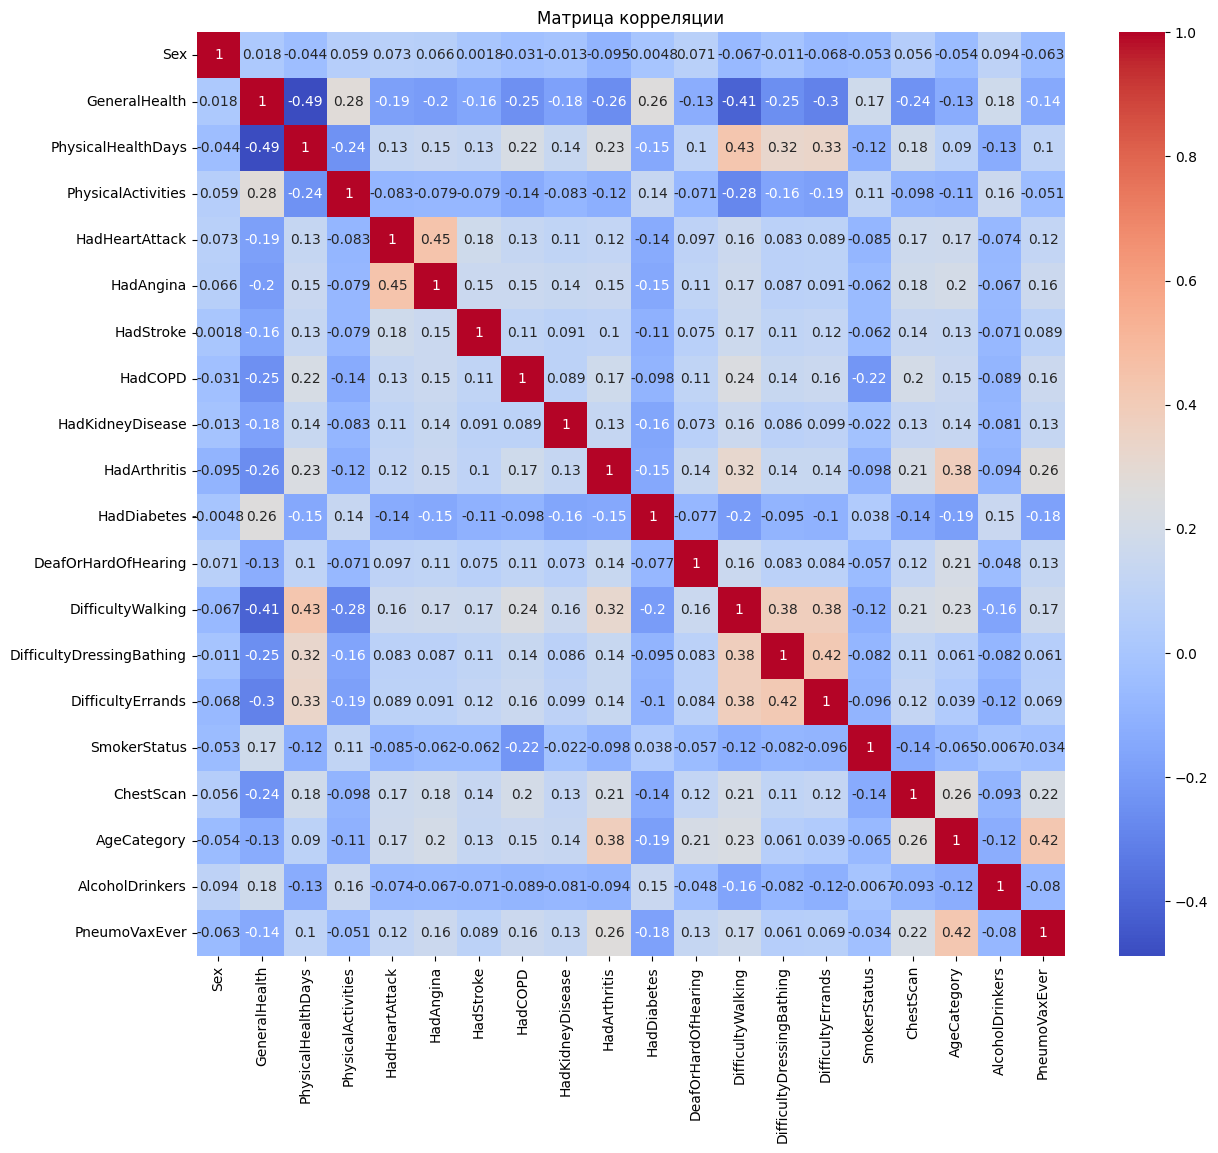

In [56]:
#Взаимозависимость признаков
plt.figure(figsize=(14,12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Все коэффициенты корреляции между экзогенными переменными < 0.5, поэтому оставим их все.

Рассмотрим эндогенную переменную.

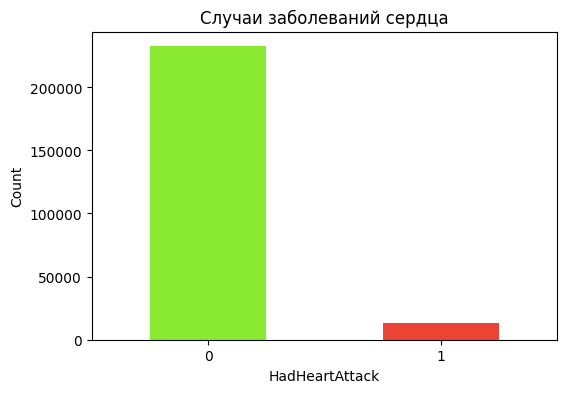

In [57]:
plt.figure(figsize=(6, 4))
data['HadHeartAttack'].value_counts().plot(kind='bar', color=mypal)
plt.title('Случаи заболеваний сердца')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Так как в данных присутствует дисбаланс классов эндогенной переменной, нужно провести перебалансировку. Для этого воспользуемся методом resample

In [67]:
data_majority = data[(data['HadHeartAttack']==0)]
data_minority = data[(data['HadHeartAttack']==1)]

data_minority_upsampled = resample(data_minority,
                                 replace=True,
                                 n_samples= 230000,
                                 random_state=42)

data = pd.concat([data_majority, data_minority_upsampled])

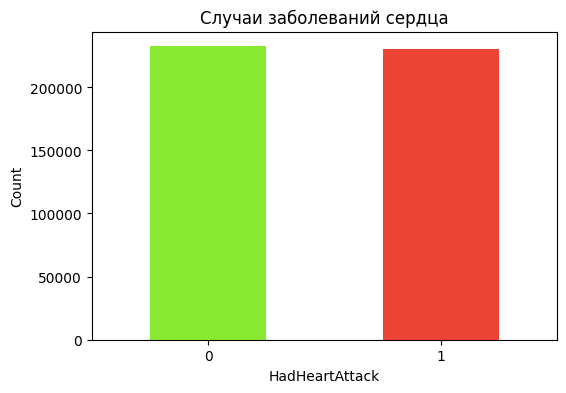

In [68]:
plt.figure(figsize=(6, 4))
data['HadHeartAttack'].value_counts().plot(kind='bar', color=mypal)
plt.title('Случаи заболеваний сердца')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Разбиваем данные на обучающую и тестовую часть случайным методом разделения.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [70]:
x = data.drop('HadHeartAttack',axis=1).values
y = data['HadHeartAttack'].values

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2 , random_state=42)

Для примера построим модель логистической регрессии и посмотрим на ее метрики

In [72]:
model = LogisticRegression()

In [73]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

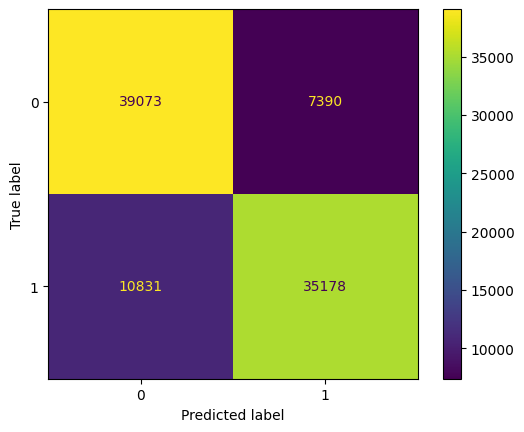

In [74]:
ConfusionMatrixDisplay.from_estimator(model.fit(x_train, y_train), x_test, y_test)

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8029565706375984


модель логистической регрессии правильно предсказала, что у 39157 человек нет болезни сердца, у 35178 есть болезнь сердца. Но модель ошиблась, предсказав, что у 10831 человека нет болезни сердца, а у 7390 есть болезнь сердца. Точность модели составила 80%, что в целом неплохо.

В данной курсовой работе был проведен предварительный анализ данных в задаче классификации болезни сердца. Был взят датасет о болезнях сердца из открытого репозитория Kaggle, который в свою очередь был основан на данных Центра по контролю и профилактике заболеваний США. В работе были построены графики и проведены зависимости между различными параметрами человека и вероятностью заболевания сердца. В результате исследования была выявлена сильная зависимость (44%) между стенокардией и болезнью сердца. Также в группе риска находятся те, кто пережил инфаркт и находятся в преклонном возрасте. На основе этой работы можно построить различные модели для предсказания вероятности болезни сердца. Выводы данного курсового проекта также могут послужить основой для создания приложения, которое могло бы предсказать вероятность болезни сердца, основываясь на на данных, введенных пациентом. Хотя такое приложение никогда не сможет заменить консультацию у кардиолога, оно может подтолкнуть человека к решению посетить больницу и проверить состояние своего здоровья у профессиональных врачей.